# Music & Mental Health 
### Group 16

** Time ** (we may del this cell before submit)
1. 02/12 Add data preprocessing part -- Yi Zhang
2. 02/14 Add data prediction part -- Cheng Qian

In [1]:
# Import general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1 Data Preprocessing

In [2]:
# File name and file path
file_name = "mxmh_survey_results.csv"
file_dir = ""

# Read file
df = pd.read_csv(file_dir+file_name)

In [3]:
# Print info of original df
# You may del this cell
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

**Missing values**
1. We can see there are 736 rows and 33 cols in total
2. Most cols are full or lack less than 5 slots
3. Col BPM lack more than 100+ slots

In [4]:
# General data cleaning
# Apply to both data analysis and prediction
# You may add more code in this cell or in a new cell

# Drop unnecessary columns
df.drop(columns=["Timestamp", "Permissions"], inplace=True)


# Handling missing values
# You can choose one method and comment others
# Our models have better performance with method 2
'''
# Method 1, filling with mode
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])
'''
# Method 2, drop
df.dropna(inplace=True)


# Drop invalid rows 
# There is a guy whose BPM is 999999999 (one billion - 1)
# He causes extreme error in our models
df.drop(df[df["BPM"]>300].index, inplace=True)

In [5]:
# Print info of preprocessed df
# You may del this cell
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 2 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           614 non-null    float64
 1   Primary streaming service     614 non-null    object 
 2   Hours per day                 614 non-null    float64
 3   While working                 614 non-null    object 
 4   Instrumentalist               614 non-null    object 
 5   Composer                      614 non-null    object 
 6   Fav genre                     614 non-null    object 
 7   Exploratory                   614 non-null    object 
 8   Foreign languages             614 non-null    object 
 9   BPM                           614 non-null    float64
 10  Frequency [Classical]         614 non-null    object 
 11  Frequency [Country]           614 non-null    object 
 12  Frequency [EDM]               614 non-null    object 
 13  Frequency 

In [6]:
# If you want to save cleaned data to a new file
'''
file_name_new = "mxmh_survey_results_cleaned.csv"
df.to_csv(file_dir+file_name_new, index=False)
'''

'\nfile_name_new = "mxmh_survey_results_cleaned.csv"\ndf.to_csv(file_dir+file_name_new, index=False)\n'

## Part 2 Data Prediction

In [7]:
# Import libraries for data prediction
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

import torch
# You may use following libraries
'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
'''

'\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\n'

In [8]:
# Data preprocessing for data prediction
# Apply only to data prediction

# Process categorical cols
# You can choose one method and comment the another
# Model NBC has better performance with method 2, other models have similar performance in both methods
'''
# Method 1, one-hot coding
data = pd.get_dummies(df, columns=["Primary streaming service", "Fav genre"], dtype=int)
y_names = ["Anxiety", "Depression", "Insomnia", "OCD", "Music effects"]
data = data[[col for col in data if col not in y_names] + \
            [col for col in data if col in y_names]] # move y(target) cols to the end of data for convenience
'''
# Method 2, drop
data = df.drop(columns=["Primary streaming service", "Fav genre"])


# Convert bool values to int
bool_cols = ["While working", "Instrumentalist", "Composer", "Exploratory", "Foreign languages"]
bool2int_dict = {"No":0, "Yes":1}
for col_name in bool_cols:
    data[col_name] = data[col_name].map(bool2int_dict)


# Convert "Music effects" to int
effect2int_dict = {"Worsen":0, "No effect":1, "Improve":2}
data["Music effects"] = data["Music effects"].map(effect2int_dict)


# Convert frequency (str) to int
freq_cols = [col_name for col_name in data.columns if col_name.startswith("Frequency")]
freq2int_dict = {"Never":0, "Rarely":1, "Sometimes":2, "Very frequently":3}
for col_name in freq_cols:
    data[col_name] = data[col_name].map(freq2int_dict)

In [9]:
# Convert data into numpy array
data = data.values

# Shuffle data
np.random.seed(1) # You may use this line to set random seed
np.random.shuffle(data)

# Split x(input) and y(output)
# The last 5 cols are y
x, y = data[:, :-5], data[:, -5:]

# Unify data type
x = x.astype(np.float32)
y = y.astype(np.int32)

# Split train set and test set
# You may use "train_test_split" in sklearn to complete this
train_ratio = 0.8 # You may change the ratio
threshold = int(train_ratio * len(x))
x_train, y_train = x[:threshold, :], y[:threshold, :]
x_test,  y_test  = x[threshold:, :], y[threshold:, :]

# Feature scaling with Z-score
# You may use "StandardScaler" in sklearn to complete this
train_mean, train_std = np.mean(x_train, axis=0), np.std(x_train, axis=0)
x_train = (x_train - train_mean) / train_std
x_test  = (x_test  - train_mean) / train_std

# Split y into 5 single parts for convenience
y_train_anxiety,    y_test_anxiety     = y_train[:, 0], y_test[:, 0]
y_train_depression, y_test_depression  = y_train[:, 1], y_test[:, 1]
y_train_insomnia,   y_test_insomnia    = y_train[:, 2], y_test[:, 2]
y_train_ocd,        y_test_ocd         = y_train[:, 3], y_test[:, 3]
y_train_effect,     y_test_effect      = y_train[:, 4], y_test[:, 4]

In [10]:
# Record performance of each model
models_MSE = {}
models_ACC = {}

** Notes **
1. Initially, I wanted to split the data prediction into 2 parts, regression and classification. In regression task, I would try to predict "Anxiety", "Depression", "Insomnia" and "OCD", because their values represent levels of symptoms. In classification task, I would try to predict music effect, because its value represent kinds of effect.
2. However, in regression task, I tried some models (linear regression, support vector machine regression, elastic net regression, random forest regression) and I found the accuracy is very poor.
3. I doubted that if my direction was wrong, so I checked other prediction code on kaggle. I found they have poor accuracy too.
4. Then, I tried classification models (classifiers) on regression task, and they appeared to have better performance. I kept SVR and SVC in the following cells for comparision.
5. You may try other models you like.
6. You may optimize parameters of models (You may need to refer sklearn and pytorch documents).
7. You may design more graphs.
8. You may change any code and explore anything new.

### Part 2.1 Support vector regressor

MSE loss on Anxiety   : 7.1422           	Accuracy on Anxiety   : 15.45%.
MSE loss on Depression: 8.9655           	Accuracy on Depression: 9.76%.
MSE loss on Insomnia  : 9.4111           	Accuracy on Insomnia  : 5.69%.
MSE loss on OCD       : 5.9704           	Accuracy on OCD       : 19.51%.
MSE loss on Effect    : 0.2762           	Accuracy on Effect    : 71.54%.


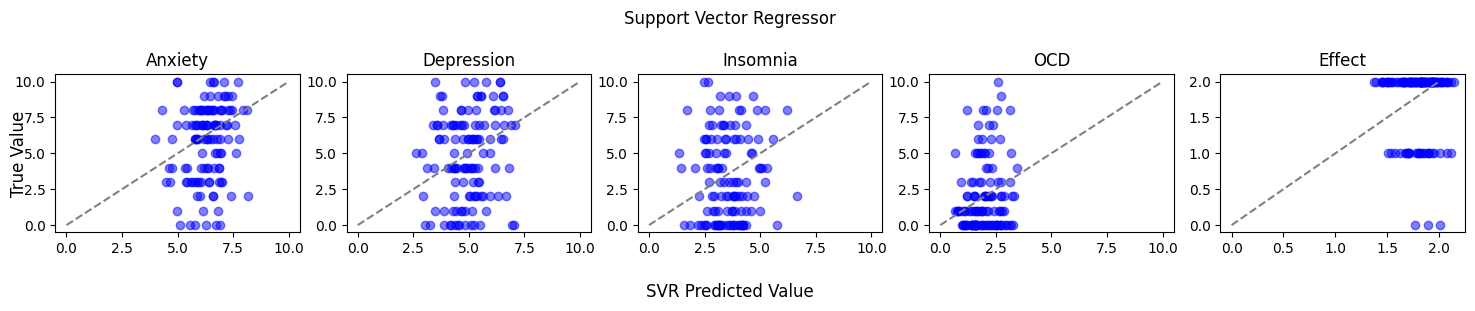

In [11]:
# Support vector regressor wtih Gaussian kernel

# Train model
SVR_anxiety    = SVR()
SVR_depression = SVR()
SVR_insomnia   = SVR()
SVR_ocd        = SVR()
SVR_effect     = SVR()

SVR_anxiety.fit(x_train, y_train_anxiety)
SVR_depression.fit(x_train, y_train_depression)
SVR_insomnia.fit(x_train, y_train_insomnia)
SVR_ocd.fit(x_train, y_train_ocd)
SVR_effect.fit(x_train, y_train_effect)

# Test model
y_pred_anxiety    = SVR_anxiety.predict(x_test).reshape(-1, 1)
y_pred_depression = SVR_depression.predict(x_test).reshape(-1, 1)
y_pred_insomnia   = SVR_insomnia.predict(x_test).reshape(-1, 1)
y_pred_ocd        = SVR_ocd.predict(x_test).reshape(-1, 1)
y_pred_effect     = SVR_effect.predict(x_test).reshape(-1, 1)

y_names = ["Anxiety", "Depression", "Insomnia", "OCD", "Effect"]
y_pred = np.concatenate((y_pred_anxiety,
                         y_pred_depression,
                         y_pred_insomnia,
                         y_pred_ocd,
                         y_pred_effect), axis=1)


# Record model performance
models_MSE["SVR"], models_ACC["SVR"] = [], []
for i in range(5):
    models_MSE["SVR"].append(mean_squared_error(y_test[:, i], y_pred[:, i]))
    # Regression model's output is float numbers, use numpy.round to convert
    models_ACC["SVR"].append(np.mean(np.round(y_pred[:, i]) == y_test[:, i]) * 100)
    print(f"MSE loss on {y_names[i]:10}: {models_MSE['SVR'][i]:.4f} \
          \tAccuracy on {y_names[i]:10}: {models_ACC['SVR'][i]:.2f}%.")


# Result visualization
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    min_y, max_y = np.min(y_test[:, i]), np.max(y_test[:, i])
    ax[i].set_title(y_names[i])
    ax[i].plot([min_y, max_y], [min_y, max_y], color="grey", linestyle="--")
    ax[i].scatter(y_pred[:, i], y_test[:, i], color="blue", alpha=0.5)

fig.supxlabel("SVR Predicted Value")
fig.supylabel("True Value")
fig.suptitle("Support Vector Regressor")
plt.tight_layout()
plt.show()


### Part 2.2 Support Vector classifier

MSE loss on Anxiety   : 10.0569           	Accuracy on Anxiety   : 17.07%.
MSE loss on Depression: 14.7724           	Accuracy on Depression: 9.76%.
MSE loss on Insomnia  : 18.4715           	Accuracy on Insomnia  : 22.76%.
MSE loss on OCD       : 10.4390           	Accuracy on OCD       : 34.96%.
MSE loss on Effect    : 0.3008           	Accuracy on Effect    : 77.24%.


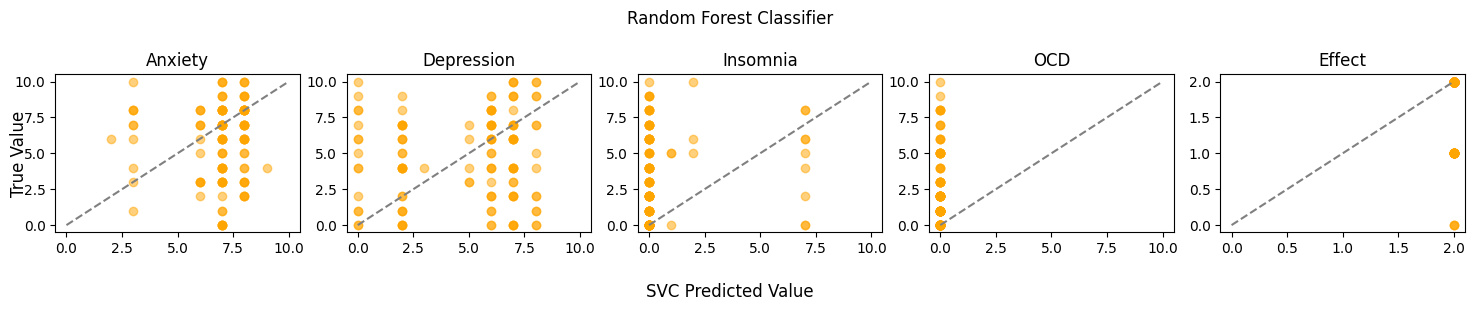

In [12]:
# Support vector classifier wtih Gaussian kernel

# Train model
SVC_anxiety    = SVC()
SVC_depression = SVC()
SVC_insomnia   = SVC()
SVC_ocd        = SVC()
SVC_effect     = SVC()

SVC_anxiety.fit(x_train, y_train_anxiety)
SVC_depression.fit(x_train, y_train_depression)
SVC_insomnia.fit(x_train, y_train_insomnia)
SVC_ocd.fit(x_train, y_train_ocd)
SVC_effect.fit(x_train, y_train_effect)

# Test model
y_pred_anxiety    = SVC_anxiety.predict(x_test).reshape(-1, 1)
y_pred_depression = SVC_depression.predict(x_test).reshape(-1, 1)
y_pred_insomnia   = SVC_insomnia.predict(x_test).reshape(-1, 1)
y_pred_ocd        = SVC_ocd.predict(x_test).reshape(-1, 1)
y_pred_effect     = SVC_effect.predict(x_test).reshape(-1, 1)

y_names = ["Anxiety", "Depression", "Insomnia", "OCD", "Effect"]
y_pred = np.concatenate((y_pred_anxiety,
                         y_pred_depression,
                         y_pred_insomnia,
                         y_pred_ocd,
                         y_pred_effect), axis=1)


# Record model performance
models_MSE["SVC"], models_ACC["SVC"] = [], []
for i in range(5):
    models_MSE["SVC"].append(mean_squared_error(y_test[:, i], y_pred[:, i]))
    models_ACC["SVC"].append(np.mean(y_pred[:, i] == y_test[:, i]) * 100)
    print(f"MSE loss on {y_names[i]:10}: {models_MSE['SVC'][i]:.4f} \
          \tAccuracy on {y_names[i]:10}: {models_ACC['SVC'][i]:.2f}%.")


# Result visualization
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    min_y, max_y = np.min(y_test[:, i]), np.max(y_test[:, i])
    ax[i].set_title(y_names[i])
    ax[i].plot([min_y, max_y], [min_y, max_y], color="grey", linestyle="--")
    ax[i].scatter(y_pred[:, i], y_test[:, i], color="orange", alpha=0.5)

fig.supxlabel("SVC Predicted Value")
fig.supylabel("True Value")
fig.suptitle("Random Forest Classifier")
plt.tight_layout()
plt.show()


### Part 2.3 Random forest classifier

MSE loss on Anxiety   : 10.7480           	Accuracy on Anxiety   : 13.82%.
MSE loss on Depression: 13.7724           	Accuracy on Depression: 11.38%.
MSE loss on Insomnia  : 18.4309           	Accuracy on Insomnia  : 16.26%.
MSE loss on OCD       : 9.7236           	Accuracy on OCD       : 34.15%.
MSE loss on Effect    : 0.3008           	Accuracy on Effect    : 77.24%.


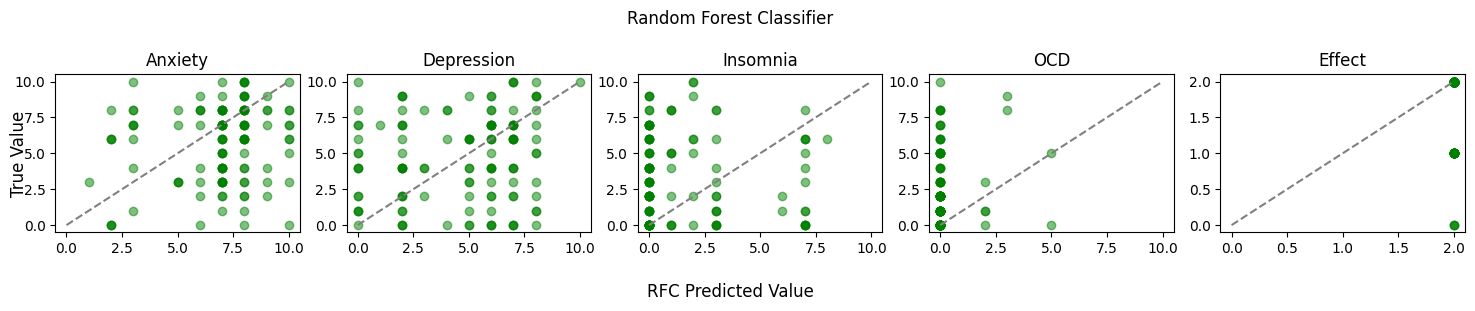

In [13]:
# Random forest classifier

# Train model
RFC_anxiety    = RandomForestClassifier()
RFC_depression = RandomForestClassifier()
RFC_insomnia   = RandomForestClassifier()
RFC_ocd        = RandomForestClassifier()
RFC_effect     = RandomForestClassifier()

RFC_anxiety.fit(x_train, y_train_anxiety)
RFC_depression.fit(x_train, y_train_depression)
RFC_insomnia.fit(x_train, y_train_insomnia)
RFC_ocd.fit(x_train, y_train_ocd)
RFC_effect.fit(x_train, y_train_effect)

# Test model
y_pred_anxiety    = RFC_anxiety.predict(x_test).reshape(-1, 1)
y_pred_depression = RFC_depression.predict(x_test).reshape(-1, 1)
y_pred_insomnia   = RFC_insomnia.predict(x_test).reshape(-1, 1)
y_pred_ocd        = RFC_ocd.predict(x_test).reshape(-1, 1)
y_pred_effect     = RFC_effect.predict(x_test).reshape(-1, 1)

y_names = ["Anxiety", "Depression", "Insomnia", "OCD", "Effect"]
y_pred = np.concatenate((y_pred_anxiety,
                         y_pred_depression,
                         y_pred_insomnia,
                         y_pred_ocd,
                         y_pred_effect), axis=1)


# Record model performance
models_MSE["RFC"], models_ACC["RFC"] = [], []
for i in range(5):
    models_MSE["RFC"].append(mean_squared_error(y_test[:, i], y_pred[:, i]))
    models_ACC["RFC"].append(np.mean(y_pred[:, i] == y_test[:, i]) * 100)
    print(f"MSE loss on {y_names[i]:10}: {models_MSE['RFC'][i]:.4f} \
          \tAccuracy on {y_names[i]:10}: {models_ACC['RFC'][i]:.2f}%.")


# Result visualization
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    min_y, max_y = np.min(y_test[:, i]), np.max(y_test[:, i])
    ax[i].set_title(y_names[i])
    ax[i].plot([min_y, max_y], [min_y, max_y], color="grey", linestyle="--")
    ax[i].scatter(y_pred[:, i], y_test[:, i], color="green", alpha=0.5)

fig.supxlabel("RFC Predicted Value")
fig.supylabel("True Value")
fig.suptitle("Random Forest Classifier")
plt.tight_layout()
plt.show()


### Part 2.4 Naive Bayes classifier

MSE loss on Anxiety   : 13.2602           	Accuracy on Anxiety   : 16.26%.
MSE loss on Depression: 19.8374           	Accuracy on Depression: 14.63%.
MSE loss on Insomnia  : 21.1545           	Accuracy on Insomnia  : 7.32%.
MSE loss on OCD       : 23.2033           	Accuracy on OCD       : 13.01%.
MSE loss on Effect    : 0.4390           	Accuracy on Effect    : 63.41%.


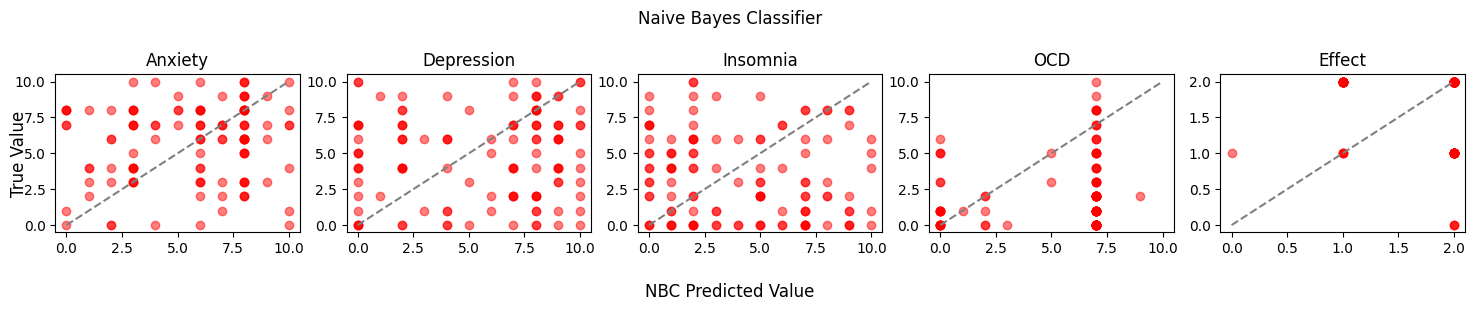

In [14]:
# Naive Bayes classifier

# Train model
NBC_anxiety    = GaussianNB()
NBC_depression = GaussianNB()
NBC_insomnia   = GaussianNB()
NBC_ocd        = GaussianNB()
NBC_effect     = GaussianNB()

NBC_anxiety.fit(x_train, y_train_anxiety)
NBC_depression.fit(x_train, y_train_depression)
NBC_insomnia.fit(x_train, y_train_insomnia)
NBC_ocd.fit(x_train, y_train_ocd)
NBC_effect.fit(x_train, y_train_effect)

# Test model
y_pred_anxiety    = NBC_anxiety.predict(x_test).reshape(-1, 1)
y_pred_depression = NBC_depression.predict(x_test).reshape(-1, 1)
y_pred_insomnia   = NBC_insomnia.predict(x_test).reshape(-1, 1)
y_pred_ocd        = NBC_ocd.predict(x_test).reshape(-1, 1)
y_pred_effect     = NBC_effect.predict(x_test).reshape(-1, 1)

y_names = ["Anxiety", "Depression", "Insomnia", "OCD", "Effect"]
y_pred = np.concatenate((y_pred_anxiety,
                         y_pred_depression,
                         y_pred_insomnia,
                         y_pred_ocd,
                         y_pred_effect), axis=1)


# Record model performance
models_MSE["NBC"], models_ACC["NBC"] = [], []
for i in range(5):
    models_MSE["NBC"].append(mean_squared_error(y_test[:, i], y_pred[:, i]))
    models_ACC["NBC"].append(np.mean(y_pred[:, i] == y_test[:, i]) * 100)
    print(f"MSE loss on {y_names[i]:10}: {models_MSE['NBC'][i]:.4f} \
          \tAccuracy on {y_names[i]:10}: {models_ACC['NBC'][i]:.2f}%.")


# Result visualization
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    min_y, max_y = np.min(y_test[:, i]), np.max(y_test[:, i])
    ax[i].set_title(y_names[i])
    ax[i].plot([min_y, max_y], [min_y, max_y], color="grey", linestyle="--")
    ax[i].scatter(y_pred[:, i], y_test[:, i], color="red", alpha=0.5)

fig.supxlabel("NBC Predicted Value")
fig.supylabel("True Value")
fig.suptitle("Naive Bayes Classifier")
plt.tight_layout()
plt.show()


### Part 2.5 Multi-layer Perceptron

MSE loss on Anxiety   : 11.7317           	Accuracy on Anxiety   : 21.14 %.
MSE loss on Depression: 16.4959           	Accuracy on Depression: 13.82 %.
MSE loss on Insomnia  : 20.0488           	Accuracy on Insomnia  : 25.20 %.
MSE loss on OCD       : 10.4390           	Accuracy on OCD       : 34.96 %.
MSE loss on Effect    : 0.3008           	Accuracy on Effect    : 77.24 %.


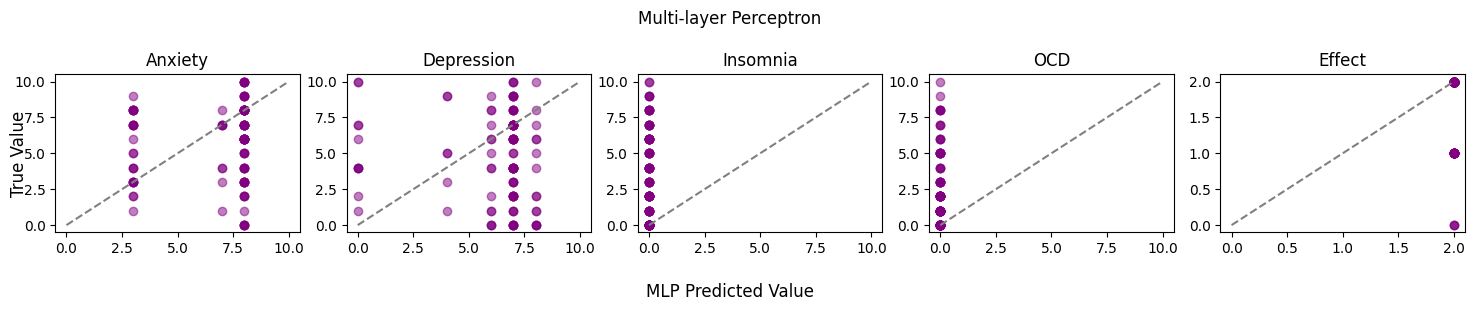

In [15]:
# Multi-layer Perceptron
# This cell may run 30s ~ 3min

# Define neural network
class MLP(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = torch.nn.Linear(input_dim, 512)
        self.fc2 = torch.nn.Linear(512, 512)
        self.fc3 = torch.nn.Linear(512, 64)
        self.fc4 = torch.nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.nn.functional.relu(self.fc3(x))
        x = torch.nn.functional.softmax(self.fc4(x), dim=1)
        return x


# Function for MLP training
def train(model, x_train, y_train, criterion, optimizer, epochs):
    model.train()
    for _ in range(epochs):
        optimizer.zero_grad()
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train.reshape(-1))
        loss.backward()
        optimizer.step()


# Symptoms have 11 classes, level 0 ~ 10
# Music effect has 3 classes
input_dim = x_train.shape[1]
MLP_anxiety    = MLP(input_dim, 11)
MLP_depression = MLP(input_dim, 11)
MLP_insomnia   = MLP(input_dim, 11)
MLP_ocd        = MLP(input_dim, 11)
MLP_effect     = MLP(input_dim, 3)


# Define loss function and optimizers
CrossEntrope = torch.nn.CrossEntropyLoss()
optimizer_anxiety    = torch.optim.SGD(MLP_anxiety.parameters(),    lr=0.005, momentum=0.6)
optimizer_depression = torch.optim.SGD(MLP_depression.parameters(), lr=0.005, momentum=0.6)
optimizer_insomnia   = torch.optim.SGD(MLP_insomnia.parameters(),   lr=0.005, momentum=0.6)
optimizer_ocd        = torch.optim.SGD(MLP_ocd.parameters(),        lr=0.005, momentum=0.6)
optimizer_effect     = torch.optim.SGD(MLP_effect.parameters(),     lr=0.005, momentum=0.6)

# Train model
x_train_tensor  = torch.tensor(x_train, dtype=torch.float)
x_test_tensor   = torch.tensor(x_test,  dtype=torch.float)

y_train_anxiety_tensor    = torch.tensor(y_train_anxiety,    dtype=torch.long)
y_train_depression_tensor = torch.tensor(y_train_depression, dtype=torch.long)
y_train_insomnia_tensor   = torch.tensor(y_train_insomnia,   dtype=torch.long)
y_train_ocd_tensor        = torch.tensor(y_train_ocd,        dtype=torch.long)
y_train_effect_tensor     = torch.tensor(y_train_effect,     dtype=torch.long)

train(MLP_anxiety,    x_train_tensor, y_train_anxiety_tensor,    CrossEntrope, optimizer_anxiety,    1000)
train(MLP_depression, x_train_tensor, y_train_depression_tensor, CrossEntrope, optimizer_depression, 1000)
train(MLP_insomnia,   x_train_tensor, y_train_insomnia_tensor,   CrossEntrope, optimizer_insomnia,   1000)
train(MLP_ocd,        x_train_tensor, y_train_ocd_tensor,        CrossEntrope, optimizer_ocd,        1000)
train(MLP_effect,     x_train_tensor, y_train_effect_tensor,     CrossEntrope, optimizer_effect,     1000)   

# Test model
y_pred_anxiety    = MLP_anxiety(   x_test_tensor).argmax(dim=1).numpy().reshape(-1, 1)
y_pred_depression = MLP_depression(x_test_tensor).argmax(dim=1).numpy().reshape(-1, 1)
y_pred_insomnia   = MLP_insomnia(  x_test_tensor).argmax(dim=1).numpy().reshape(-1, 1)
y_pred_ocd        = MLP_ocd(       x_test_tensor).argmax(dim=1).numpy().reshape(-1, 1)
y_pred_effect     = MLP_effect(    x_test_tensor).argmax(dim=1).numpy().reshape(-1, 1)


y_names = ["Anxiety", "Depression", "Insomnia", "OCD", "Effect"]
y_pred = np.concatenate((y_pred_anxiety,
                         y_pred_depression,
                         y_pred_insomnia,
                         y_pred_ocd,
                         y_pred_effect), axis=1)


# Recordd model performance
models_MSE["MLP"], models_ACC["MLP"] = [], []
for i in range(5):
    models_MSE["MLP"].append(mean_squared_error(y_test[:, i], y_pred[:, i]))
    models_ACC["MLP"].append(np.mean(y_pred[:, i] == y_test[:, i]) * 100)
    print(f"MSE loss on {y_names[i]:10}: {models_MSE['MLP'][i]:.4f} \
          \tAccuracy on {y_names[i]:10}: {models_ACC['MLP'][i]:.2f} %.")


# Result visualization
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    min_y, max_y = np.min(y_test[:, i]), np.max(y_test[:, i])
    ax[i].set_title(y_names[i])
    ax[i].plot([min_y, max_y], [min_y, max_y], color="grey", linestyle="--")
    ax[i].scatter(y_pred[:, i], y_test[:, i], color="purple", alpha=0.5)

fig.supxlabel("MLP Predicted Value")
fig.supylabel("True Value")
fig.suptitle("Multi-layer Perceptron")
plt.tight_layout()
plt.show()


### Part 2.6 Model comparision

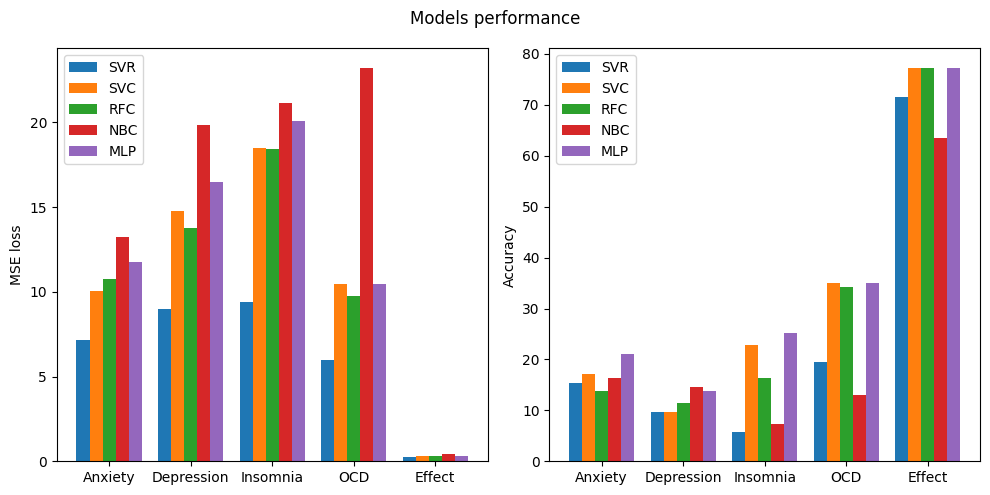

In [16]:
# Visualize MSE and ACC
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Parameters for bar graph
y_names   = ["Anxiety", "Depression", "Insomnia", "OCD", "Effect"] 
bar_width = 0.16


# Draw MSE loss bar graph
for idx, (key, val) in enumerate(models_MSE.items()):
    offset = idx * bar_width
    bars = ax[0].bar(x      = offset + np.arange(len(models_MSE)),
                     height = val,
                     width  = bar_width,
                     label  = key)
    
ax[0].legend(loc="upper left")
ax[0].set_ylabel("MSE loss")
ax[0].set_xticks(2*bar_width + np.arange(len(models_MSE)), y_names)


# Draw Accuracy bar graph
for idx, (key, val) in enumerate(models_ACC.items()):
    offset = idx * bar_width
    bars = ax[1].bar(x      = offset + np.arange(len(models_ACC)),
                     height = val,
                     width  = bar_width,
                     label  = key)

ax[1].legend(loc="upper left")
ax[1].set_ylabel("Accuracy")
ax[1].set_xticks(2*bar_width + np.arange(len(models_ACC)), y_names)

fig.suptitle("Models performance")
plt.tight_layout()
plt.show()

**Note**
1. In MSE loss graph (left), the lower bar, the better.
2. In Accuracy graph (right), the taller bar, the better.
3. I feel the symptoms are not suitable features for prediction

### Part 2.7 Exploration
What if we consider the symptoms ("Anxiety", "Depression", "Insomnis" and "OCD") as input?

In [17]:
# Get new input
symptom_mean, symptom_std = np.mean(y_train[:, :4], axis=0), np.std(y_train[:, :4], axis=0)

_x_train_symptom = (y_train[:, :4] - symptom_mean) / symptom_std
_x_test_symptom  = (y_test[:,  :4] - symptom_mean) / symptom_std

_x_train = np.concatenate((x_train, _x_train_symptom), axis=1)
_x_test  = np.concatenate((x_test,  _x_test_symptom),  axis=1)


# Initiate models
SVR_ex = SVR()
SVC_ex = SVC()
RFR_ex = RandomForestClassifier()
NBC_ex = GaussianNB()
MLP_ex = MLP(_x_train.shape[1], 3)

new_MSE = []
new_ACC = []


# Train and test
model_objects = [SVR_ex, SVC_ex, RFR_ex, NBC_ex, MLP_ex]
for model in model_objects:
    if isinstance(model, MLP):
        # MLP
        optimizer_ex = torch.optim.SGD(MLP_ex.parameters(), lr=0.005, momentum=0.6)
        train(MLP_ex,
              torch.tensor(_x_train,       dtype=torch.float),
              torch.tensor(y_train_effect, dtype=torch.long),
              CrossEntrope,
              optimizer_ex,
              1000)
        _y_pred = model(torch.tensor(_x_test, dtype=torch.float)).argmax(dim=1).numpy()
    else:
        # Other models
        model.fit(_x_train, y_train_effect)
        _y_pred = model.predict(_x_test)

    # Record performance
    mse = mean_squared_error(y_test_effect, _y_pred)
    acc = np.mean(np.round(_y_pred) == y_test_effect) * 100
    new_MSE.append(mse)
    new_ACC.append(acc)


# Print MSE loss and accuracy
model_names = ["SVR", "SVC", "RFC", "NBC", "MLP"]
for i in range(5):
    print(f"MSE loss of {model_names[i]:10}: {new_MSE[i]:.4f} \
          \tAccuracy of {model_names[i]:10}: {new_ACC[i]:.2f} %.")


MSE loss of SVR       : 0.2711           	Accuracy of SVR       : 75.61 %.
MSE loss of SVC       : 0.3008           	Accuracy of SVC       : 77.24 %.
MSE loss of RFC       : 0.2927           	Accuracy of RFC       : 78.05 %.
MSE loss of NBC       : 0.4309           	Accuracy of NBC       : 66.67 %.
MSE loss of MLP       : 0.3008           	Accuracy of MLP       : 77.24 %.


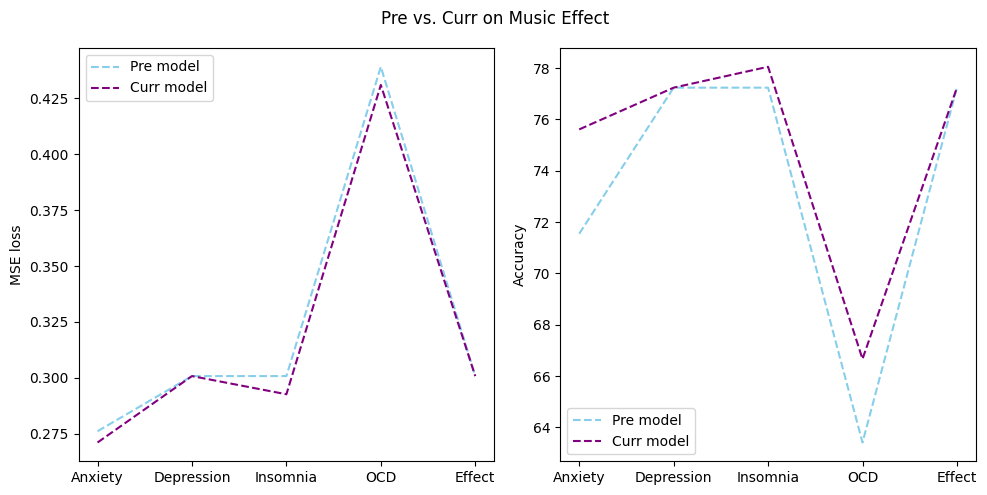

In [18]:
# Visualize the relation between difference input and accuracy on music effect 
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

model_names = ["SVR", "SVC", "RFC", "NBC", "MLP"]
y_names     = ["Anxiety", "Depression", "Insomnia", "OCD", "Effect"]

pre_MSE = [val[-1] for val in models_MSE.values()]
pre_ACC = [val[-1] for val in models_ACC.values()]


# Draw MSE loss line graph
ax[0].plot(np.arange(len(pre_MSE)), pre_MSE, color="skyblue", label="Pre model",  linestyle="--")
ax[0].plot(np.arange(len(new_MSE)), new_MSE, color="purple",  label="Curr model", linestyle='--')
ax[0].legend(loc="upper left")
ax[0].set_ylabel("MSE loss")
ax[0].set_xticks(np.arange(len(y_names)), y_names)


# Draw accuracy line graph
ax[1].plot(np.arange(len(pre_ACC)), pre_ACC, color="skyblue", label="Pre model",  linestyle="--")
ax[1].plot(np.arange(len(new_ACC)), new_ACC, color="purple",  label="Curr model", linestyle='--')
ax[1].legend(loc="lower left")
ax[1].set_ylabel("Accuracy")
ax[1].set_xticks(np.arange(len(y_names)), y_names)

fig.suptitle("Pre vs. Curr on Music Effect")
plt.tight_layout()
plt.show()

**Conclusion**
There's a little improvement on SVR, RFC, NBC.

## Part 3 Data Analysis

In [ ]:
# Data Analysis